# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).   

## Основные теоретические положения

Дискретный сигнал: $ x_0, x_1, x_2, \ldots, x_{N-1} $ как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $ S(t) $.

Будем считать, что отсчеты $ x_k, \, k = 0, 1, \ldots, N-1 $ дискретного сигнала получены в результате равномерной дискретизации сигнала $ S(t) $ с шагом дискретизации, равным единице: $ x_k = s(t_k), \, k = 0, 1, \ldots, N-1; \, t_k - t_{k-1} = T, \, k = 1, 2, \ldots, N-1; \, T = 1 $

Дискретный сигнал в виде функции от времени: $ s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t-k). \quad $

Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $ 2\pi $: $ S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}, \quad $

Дискретный сигнал можно представить в виде: $ s_d(t) = \sum_{k=-\infty}^{\infty} s(t) \delta(t-kT) \quad $

Дискретный сигнал может быть записан в виде: $ s_d(t) = \frac{1}{T} \sum_{k=-\infty}^{\infty} s(t) e^{i\omega_k t}, \quad $

а спектр: $ S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S\left(\omega - \frac{2\pi k}{T}\right) \quad $




## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

In [56]:
import numpy as np
import random
from scipy.signal import savgol_filter

import matplotlib.pyplot as plt
import seaborn as sns

### Задание 1.

Сформировать дискретный сигнал посредством дискретизации с шагом $ T = 1 $ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $ A_k\cos{(\omega_kt+φ_k)} $. Частота каждой из гармоник не должна превышать $ \pi $. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $ \triangle \omega = 0.1\pi $. Амплитуды гармоник $ A_k $ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $ φ_k $ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($ N = 31 $).

In [25]:
# Параметры
T = 1  # шаг дискретизации
num_harmonics = 11
N = 32

# Генерация частот: от 0 до π с шагом 0.1π
omega_k = np.linspace(0, np.pi, num_harmonics)

# Генерация случайных амплитуд от 1 до 11
A_k = np.random.randint(1, 12, num_harmonics)

# Нормализация амплитуд
A_k = A_k / np.sum(A_k)

# Генерация случайных начальных фаз от 0 до 0.5
phi_k = np.random.uniform(0, 0.5, num_harmonics)

# Формирование дискретного сигнала
t = np.arange(N)
signal = np.zeros(N)

for k in range(num_harmonics):
    signal += A_k[k] * np.cos(omega_k[k] * t + phi_k[k])

# Вывод сигнала
print("Дискретный сигнал:")
print(signal)

Дискретный сигнал:
[ 0.96387785 -0.05952201  0.30867108  0.1268231   0.41012663 -0.1093272
  0.1837441  -0.01840868  0.22862774 -0.11378484  0.25352591 -0.16798757
  0.31195923  0.10289767  0.13749958 -0.01203127  0.54507658  0.16676191
  0.30439885  0.10645194  0.96387785 -0.05952201  0.30867108  0.1268231
  0.41012663 -0.1093272   0.1837441  -0.01840868  0.22862774 -0.11378484
  0.25352591 -0.16798757]


### Задание 2.

Визуализировать исходные аналоговый и дискретизированный сигналы.

In [26]:
fine_time_steps = 1000  # количество точек для аналогового графика

# Формирование аналогового сигнала
t_analog = np.linspace(0, N - 1, fine_time_steps)
signal_analog = np.zeros(fine_time_steps)

for k in range(num_harmonics):
    signal_analog += A_k[k] * np.cos(omega_k[k] * t_analog + phi_k[k])


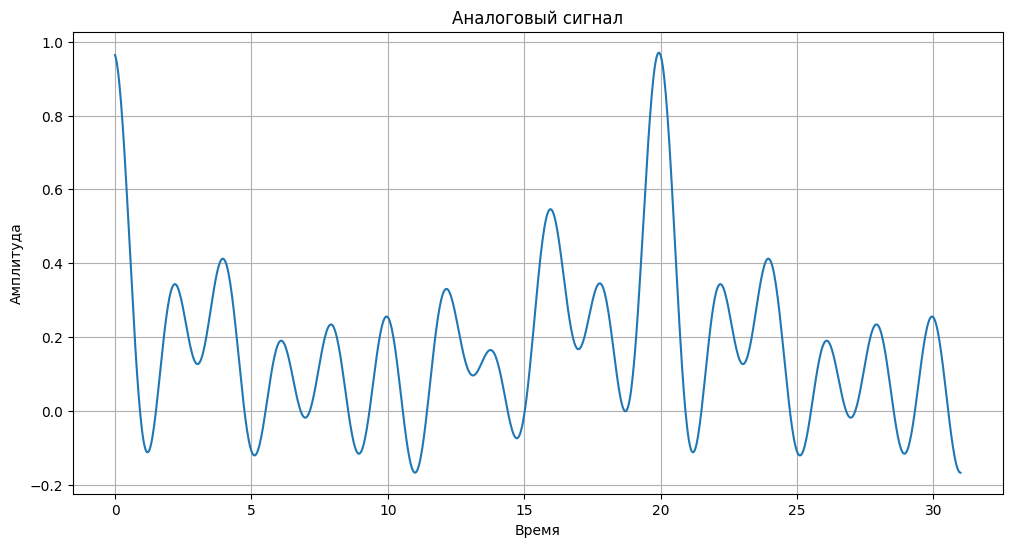

In [27]:
# Визуализация аналогового сигнала
plt.figure(figsize=(12, 6))
plt.plot(t_analog, signal_analog)
plt.title('Аналоговый сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

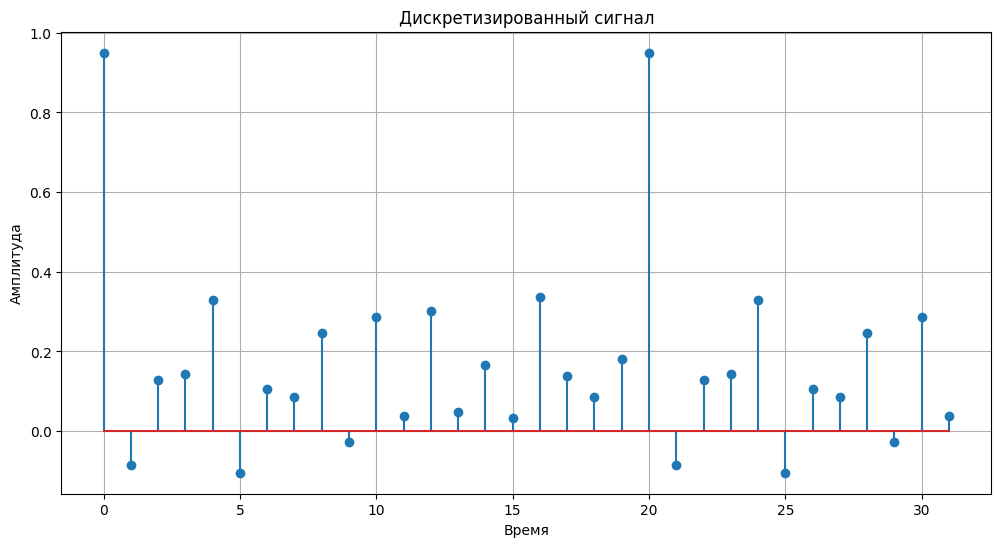

In [28]:
# Визуализация дискретизированного сигнала
plt.figure(figsize=(12, 6))
plt.stem(t_discrete, signal_discrete)
plt.title('Дискретизированный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


### Задание 3.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде:

$
s_d(t) = \sum_{k=-\infty}^{\infty} s(t) \delta(t-kT) \quad
$

Вынесем $ s(t) $ за знак суммы:

$
s_d(t) = s(t) \sum_{k=-\infty}^{\infty} \delta(t-kT) \quad
$

Сумма в может быть представлена комплексным рядом Фурье:

$ 
\sum_{k=-\infty}^{\infty} \delta(t-kT) = \sum_{k=-\infty}^{\infty} c_k e^{i\omega_k t} 
$

где:

$
\omega_k = \frac{2\pi k}{T} \quad ; \quad c_k = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \delta(t) e^{-i\omega_k t} \, dt = \frac{1}{T} 
$

Таким образом дискретный сигнал может быть записан в виде:

$
s_d(t) = \frac{1}{T} \sum_{k=-\infty}^{\infty} s(t) e^{i\omega_k t}, \quad 
$

а его спектр:

$
S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S\left(\omega - \frac{2\pi k}{T}\right) \quad 
$


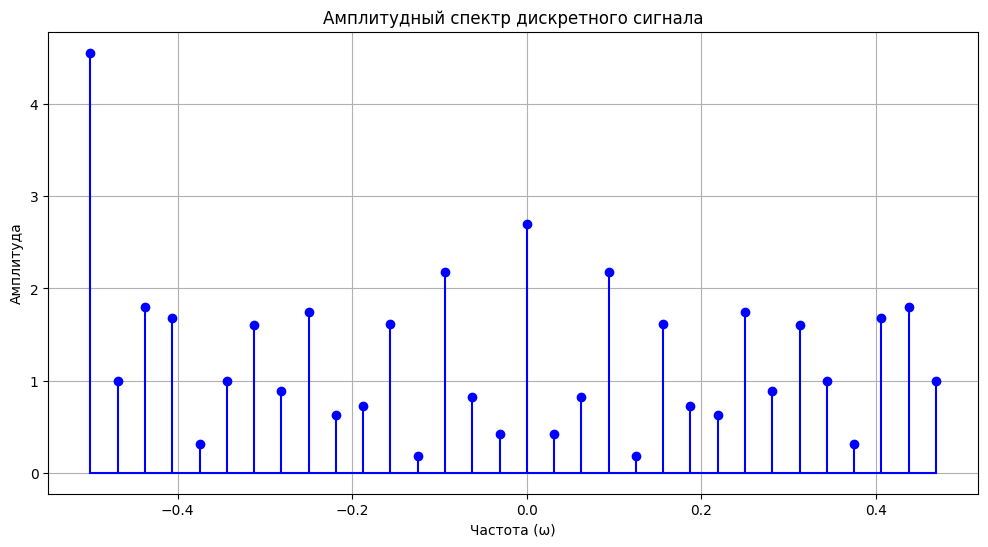

In [66]:
# Вычисление ДПФ дискретного сигнала
spectrum = np.fft.fft(signal_discrete)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация амплитудного спектра
plt.figure(figsize=(12, 6))
plt.stem(freqs, np.abs(spectrum), 'b', basefmt="-b")
plt.title('Амплитудный спектр дискретного сигнала')
plt.xlabel('Частота (ω)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


### Задание 4.

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $ H(\omega) $ – передаточной функции (частотной характеристики) фильтра.

1. Фильтр на 5 точек:

    $
    H_5(\omega) = \frac{1}{5} \sum_{m=0}^{4} e^{-i\omega m} = \frac{1}{5} (1 + e^{-i\omega} + e^{-i2\omega} + e^{-i3\omega} + e^{-i4\omega})
    $

2. Фильтр на 9 точек:

    $
    H_9(\omega) = \frac{1}{9} \sum_{m=0}^{8} e^{-i\omega m} = \frac{1}{9} (1 + e^{-i\omega} + e^{-i2\omega} + \ldots + e^{-i8\omega})
    $

In [31]:
# Фильтры
filter_5 = np.ones(5) / 5
filter_9 = np.ones(9) / 9

# Применение фильтров
smoothed_signal_5 = np.convolve(signal_discrete, filter_5, mode='same')
smoothed_signal_9 = np.convolve(signal_discrete, filter_9, mode='same')


### Задание 5.

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

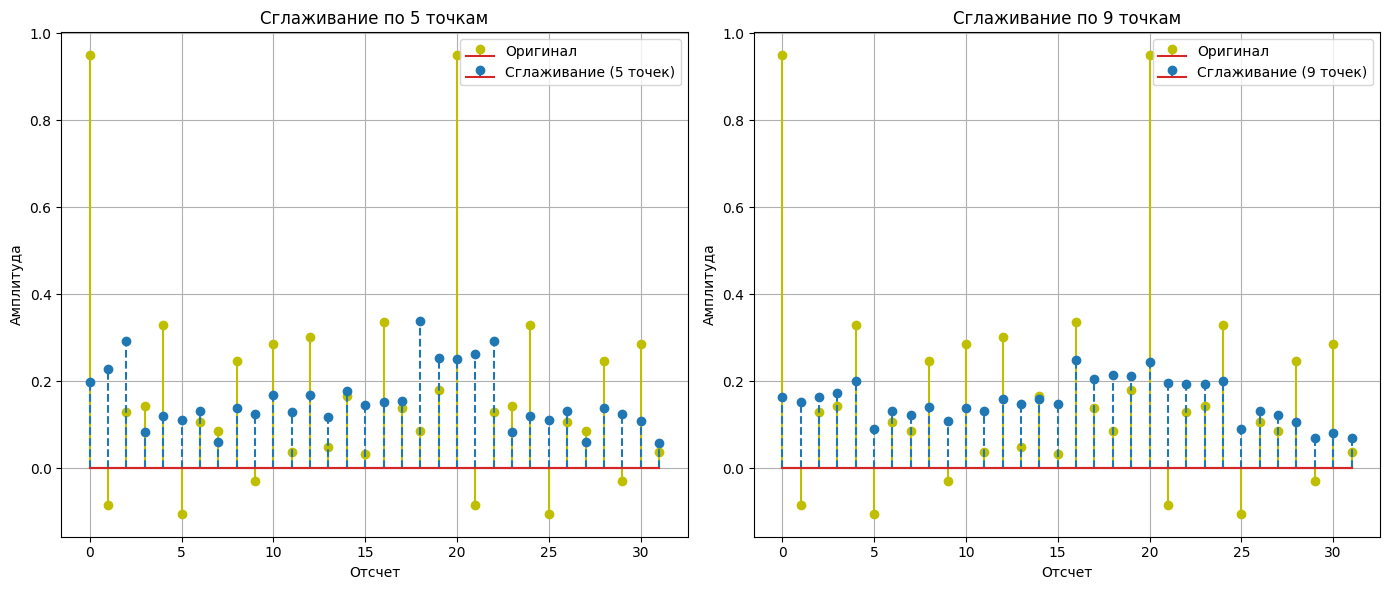

In [43]:
# Визуализация исходного дискретного сигнала и сигнала после сглаживания
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.stem(t_discrete, signal_discrete, linefmt='y', label='Оригинал')
plt.stem(t_discrete, smoothed_signal_5, linefmt='o--', label='Сглаживание (5 точек)')
plt.title('Сглаживание по 5 точкам')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(t_discrete, signal_discrete, linefmt='y', label='Оригинал')
plt.stem(t_discrete, smoothed_signal_9, linefmt='o--', label='Сглаживание (9 точек)')
plt.title('Сглаживание по 9 точкам')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()


### Задание 6.

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

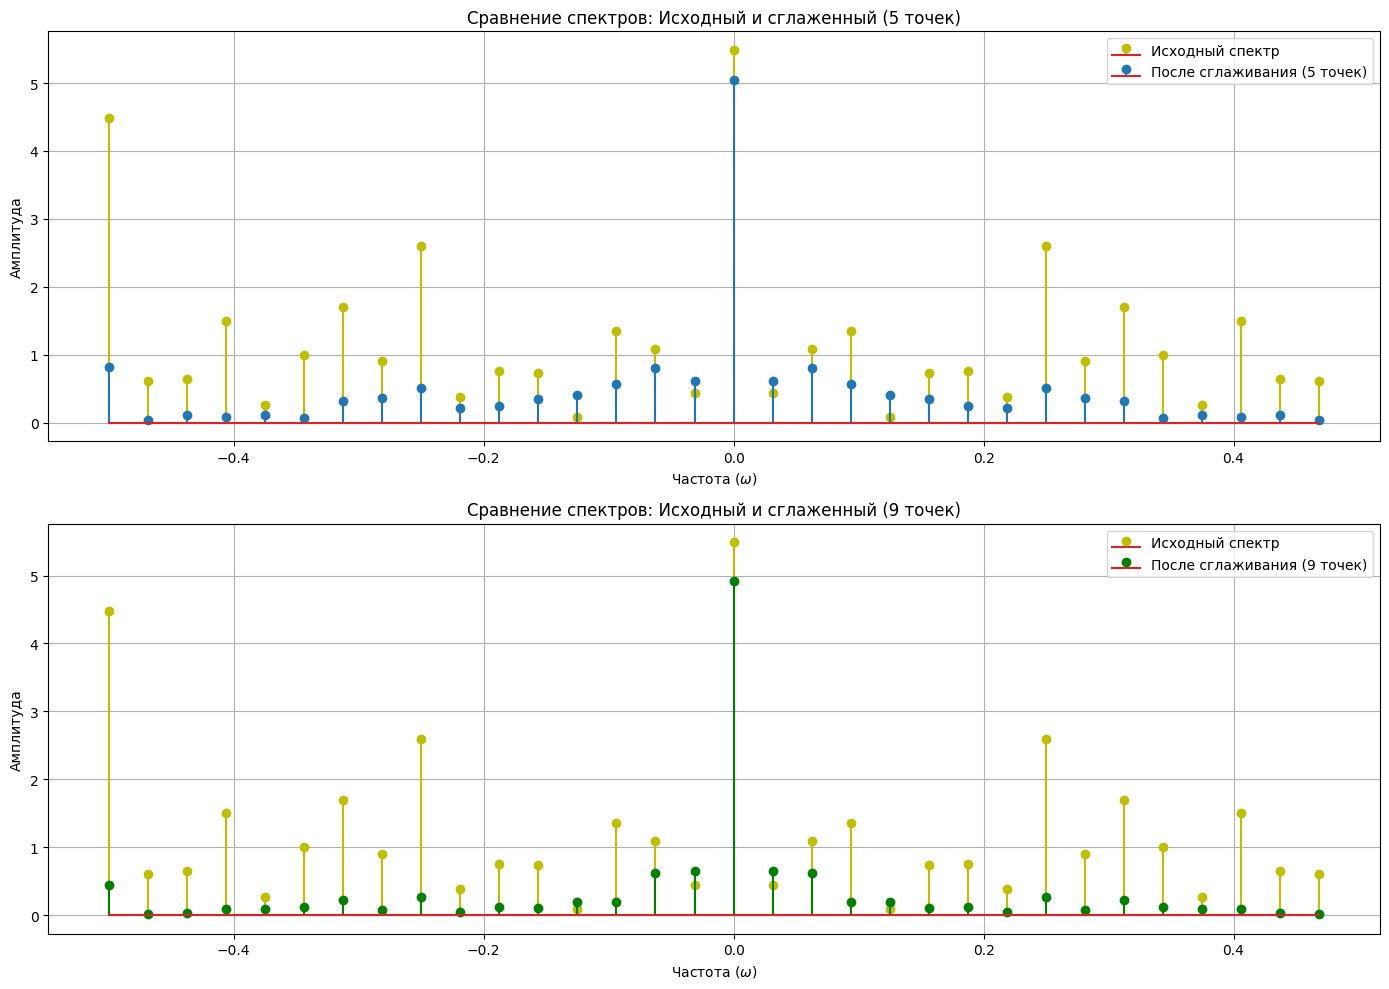

In [55]:
# Вычисление ДПФ для каждого сигнала
spectrum_original = np.fft.fft(signal_discrete, N)
spectrum_smoothed_5 = np.fft.fft(smoothed_signal_5, N)
spectrum_smoothed_9 = np.fft.fft(smoothed_signal_9, N)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация спектров
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.stem(freqs, np.abs(spectrum_original), label='Исходный спектр', linefmt='y')
plt.stem(freqs, np.abs(spectrum_smoothed_5), label='После сглаживания (5 точек)', linefmt='o-')
plt.title('Сравнение спектров: Исходный и сглаженный (5 точек)')
plt.xlabel('Частота $(ω)$')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(freqs, np.abs(spectrum_original), label='Исходный спектр', linefmt='y')
plt.stem(freqs, np.abs(spectrum_smoothed_9), label='После сглаживания (9 точек)', linefmt='g-')
plt.title('Сравнение спектров: Исходный и сглаженный (9 точек)')
plt.xlabel('Частота $(ω)$')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Задание 7.

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

На представленных графиках показаны амплитудные спектры оригинального и сглаженных сигналов. На основе полученных графиков можно сделать следующие выводы:

- Оригинальный сигнал: имеет много частотных компонент, включая и низкочастотные, и высокочастотные составляющие.

- Сглаживание на 5 точек: амплитуды высокочастотных компонент снижаются, но не исчезают полностью. Фильтр сглаживает часть колебаний, сохраняя основные низкочастотные компоненты.

- Сглаживание на 9 точек: более выраженное ослабление высокочастотных компонент. Это связано с тем, что шире окна фильтра позволяют более эффективно усреднять изменения.

**Соответствие $ H(\omega) $**

Низкочастотные компоненты остаются относительно нетронутыми, высокочастотные компоненты заметно ослаблены.

Оба фильтра эффективно снижают амплитуды более высокочастотных компонент, усиливая низкочастотное содержание сигнала.

Фильтр на 9 точек оказывает более сильное влияние на ослабление высокочастотного шума по сравнению с фильтром на 5 точек. Это связано с тем, что большой фильтр усредняет больше значений, тем самым более результативно подавляет высокочастотные компоненты.

### Задание 8.

Повторить п. 4–7 для следующих фильтров:

    a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
    b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

**Полином 2-й степени**

- Фильтр на 5 узлов:

    $ H_5(\omega) = \frac{1}{35} \left( 17 + 24 \cos(\omega) - 6 \cos(2\omega) \right)$
  
- Фильтр на 9 узлов:

  $ H_9(\omega) = \frac{1}{231} \left( 59 + 108 \cos(\omega) + 78 \cos(2\omega) + 28 \cos(3\omega) - 42 \cos(4\omega) \right)$

**Полином 4-й степени**

- Фильтр на 7 узлов:

  $ H_7(\omega) = \frac{1}{231} \left( 131 + 150 \cos(\omega) - 60 \cos(2\omega) + 10 \cos(3\omega) \right)$

- Фильтр на 11 узлов:

  $ H_{11}(\omega) = \frac{1}{429} \left( 143 + 240 \cos(\omega) + 120 \cos(2\omega) - 20 \cos(3\omega) - 90 \cos(4\omega) + 36 \cos(5\omega) \right) $

Эти выражения описывают, как фильтры воздействуют на различные частоты в сигнале. Коэффициенты перед каждым $\cos$ указывают, насколько сильно те или иные гармоники присутствуют или уменьшаются в фильтре.


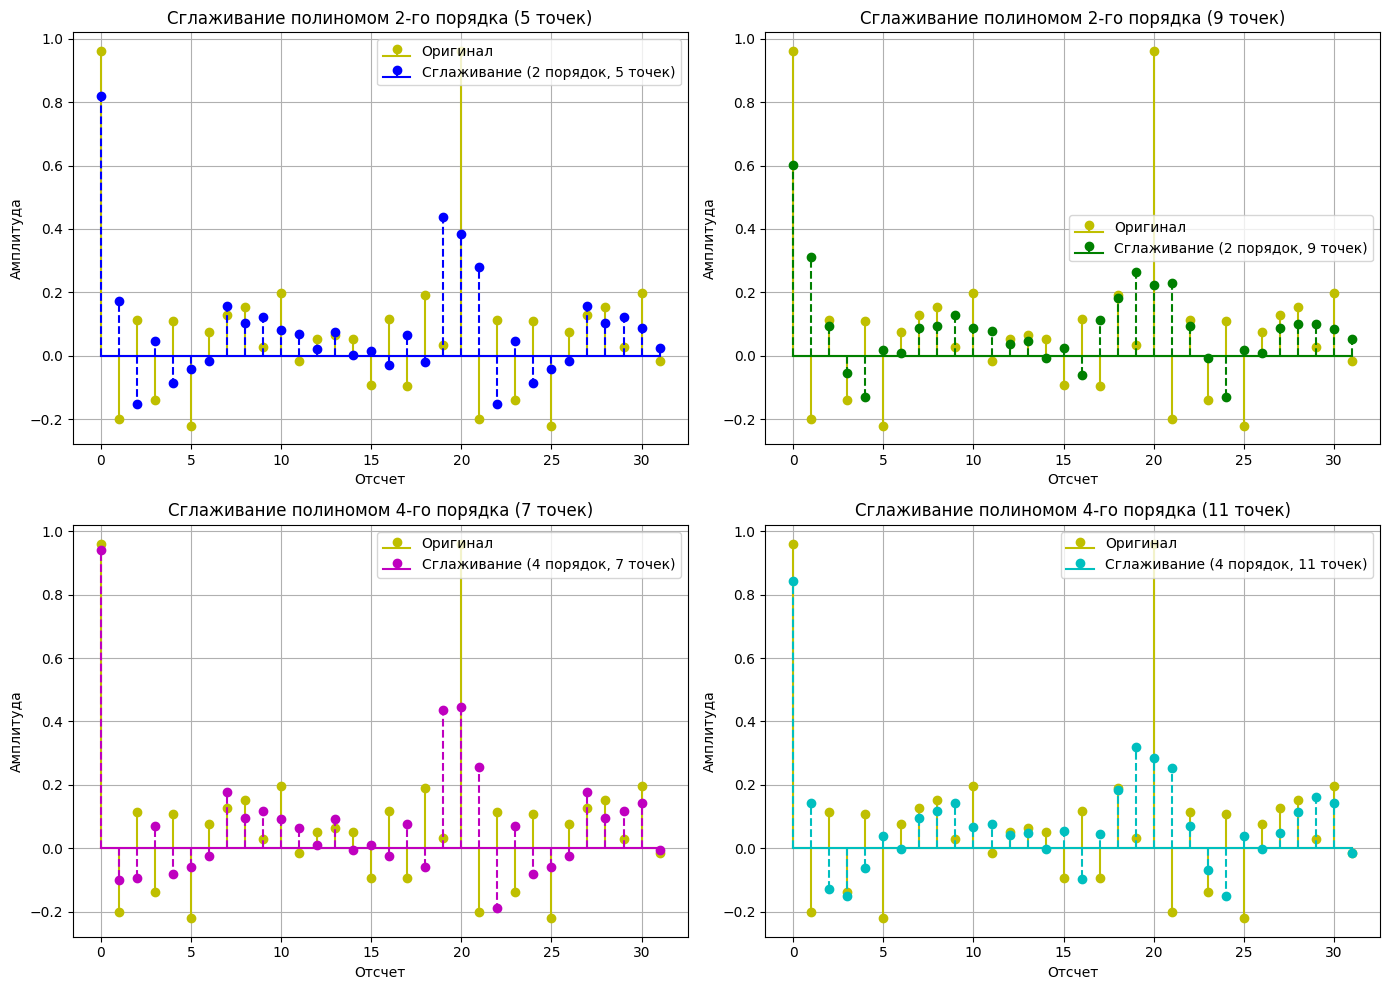

In [63]:
# Сглаживание полиномом
smoothed_poly_2_5 = savgol_filter(signal_discrete, 5, 2)
smoothed_poly_2_9 = savgol_filter(signal_discrete, 9, 2)
smoothed_poly_4_7 = savgol_filter(signal_discrete, 7, 4)
smoothed_poly_4_11 = savgol_filter(signal_discrete, 11, 4)

# Визуализация сглаживания
plt.figure(figsize=(14, 10))

# Полином 2 степени, 5 точек
plt.subplot(2, 2, 1)
plt.stem(t_discrete, signal_discrete, linefmt='y', markerfmt="yo", basefmt="-y", label='Оригинал')
plt.stem(t_discrete, smoothed_poly_2_5, linefmt='b--', markerfmt="bo", basefmt="-b", label='Сглаживание (2 порядок, 5 точек)')
plt.title('Сглаживание полиномом 2-го порядка (5 точек)')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Полином 2 степени, 9 точек
plt.subplot(2, 2, 2)
plt.stem(t_discrete, signal_discrete, linefmt='y', markerfmt="yo", basefmt="-y", label='Оригинал')
plt.stem(t_discrete, smoothed_poly_2_9, linefmt='g--', markerfmt="go", basefmt="-g", label='Сглаживание (2 порядок, 9 точек)')
plt.title('Сглаживание полиномом 2-го порядка (9 точек)')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Полином 4 степени, 7 точек
plt.subplot(2, 2, 3)
plt.stem(t_discrete, signal_discrete, linefmt='y', markerfmt="yo", basefmt="-y", label='Оригинал')
plt.stem(t_discrete, smoothed_poly_4_7, linefmt='m--', markerfmt="mo", basefmt="-m", label='Сглаживание (4 порядок, 7 точек)')
plt.title('Сглаживание полиномом 4-го порядка (7 точек)')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# Полином 4 степени, 11 точек
plt.subplot(2, 2, 4)
plt.stem(t_discrete, signal_discrete, linefmt='y', markerfmt="yo", basefmt="-y", label='Оригинал')
plt.stem(t_discrete, smoothed_poly_4_11, linefmt='c--', markerfmt="co", basefmt="-c", label='Сглаживание (4 порядок, 11 точек)')
plt.title('Сглаживание полиномом 4-го порядка (11 точек)')
plt.xlabel('Отсчет')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

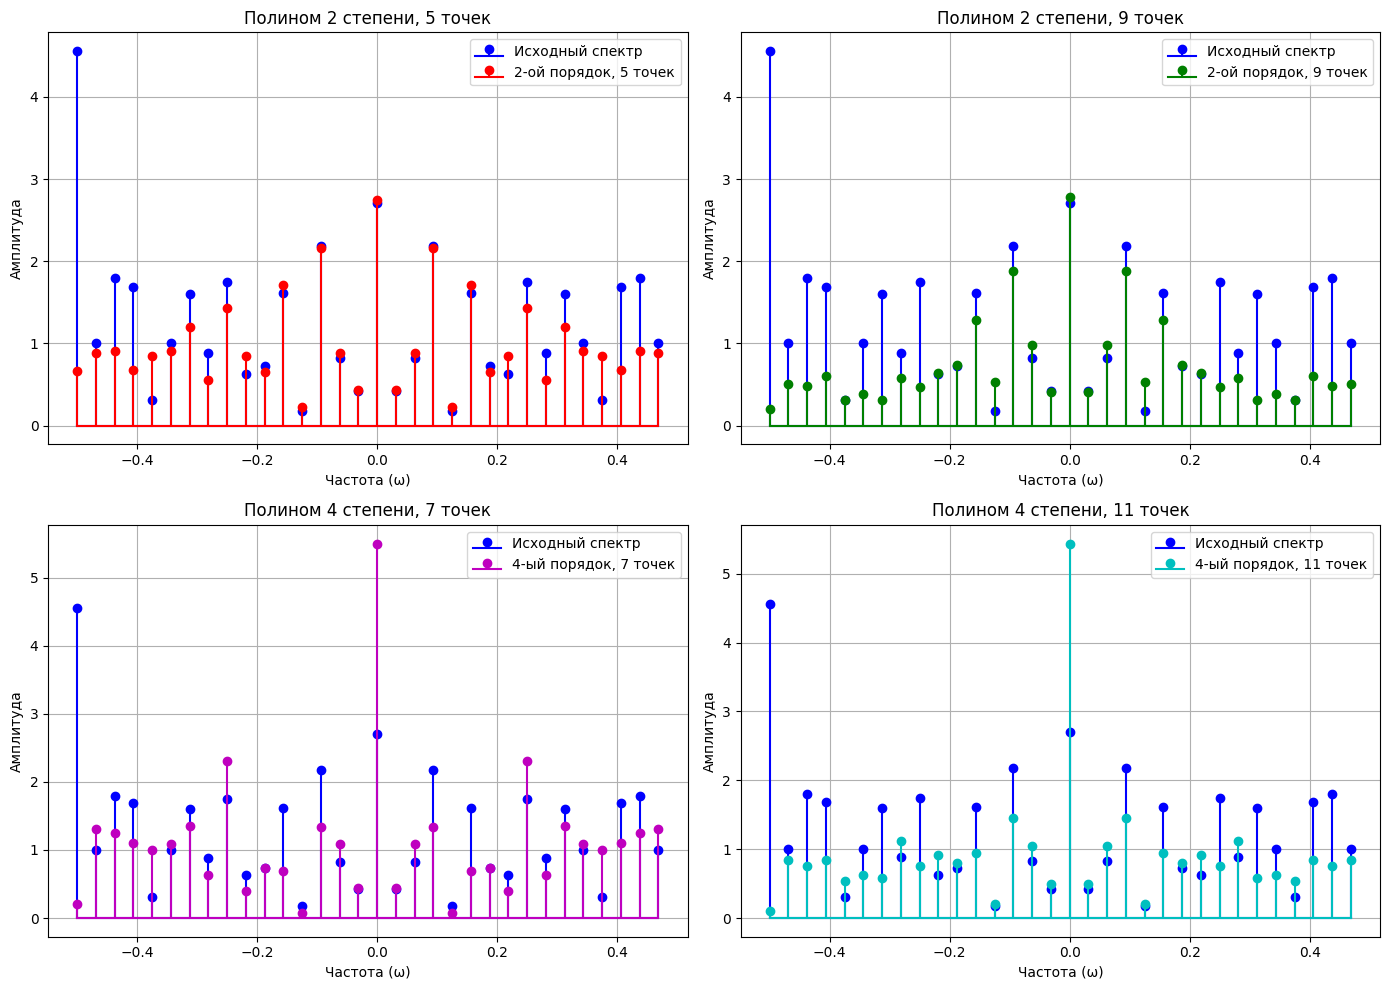

In [64]:
# Сглаживание полиномом
smoothed_poly_2_5 = savgol_filter(signal_discrete, 5, 2)
smoothed_poly_2_9 = savgol_filter(signal_discrete, 9, 2)

# Вычисление ДПФ
spectrum_original = np.fft.fft(signal_discrete, N)
spectrum_poly_2_5 = np.fft.fft(smoothed_poly_2_5, N)
spectrum_poly_2_9 = np.fft.fft(smoothed_poly_2_9, N)

# Частоты для оси x
freqs = np.fft.fftfreq(N, d=T)

# Визуализация спектров
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Полином 2 степени, 5 точек
axs[0, 0].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[0, 0].stem(freqs, np.abs(spectrum_poly_2_5), 'r', markerfmt="ro", basefmt="-r", label='2-ой порядок, 5 точек', linefmt='r-')
axs[0, 0].set_title('Полином 2 степени, 5 точек')
axs[0, 0].set_xlabel('Частота (ω)')
axs[0, 0].set_ylabel('Амплитуда')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Полином 2 степени, 9 точек
axs[0, 1].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[0, 1].stem(freqs, np.abs(spectrum_poly_2_9), 'g', markerfmt="go", basefmt="-g", label='2-ой порядок, 9 точек', linefmt='g-')
axs[0, 1].set_title('Полином 2 степени, 9 точек')
axs[0, 1].set_xlabel('Частота (ω)')
axs[0, 1].set_ylabel('Амплитуда')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Полином 4 степени, 7 точек
axs[1, 0].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[1, 0].stem(freqs, np.abs(spectrum_poly_4_7), 'm', markerfmt="mo", basefmt="-m", label='4-ый порядок, 7 точек', linefmt='m-')
axs[1, 0].set_title('Полином 4 степени, 7 точек')
axs[1, 0].set_xlabel('Частота (ω)')
axs[1, 0].set_ylabel('Амплитуда')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Полином 4 степени, 11 точек
axs[1, 1].stem(freqs, np.abs(spectrum_original), 'b', markerfmt="bo", basefmt="-b", label='Исходный спектр')
axs[1, 1].stem(freqs, np.abs(spectrum_poly_4_11), 'c', markerfmt="co", basefmt="-c", label='4-ый порядок, 11 точек', linefmt='c-')
axs[1, 1].set_title('Полином 4 степени, 11 точек')
axs[1, 1].set_xlabel('Частота (ω)')
axs[1, 1].set_ylabel('Амплитуда')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Проанализируем полученные резулуьтаты

1. Полином 2-й степени, 5 точек:
    - Влияние: Наблюдается снижение амплитуд высокочастотных составляющих по сравнению с исходным спектром.
    - Вывод: Сглаживание на 5 точек эффективно уменьшает высокочастотные шумы.

2. Полином 2-й степени, 9 точек:
    - Влияние: Более низкие частоты становятся более акцентированными, чем при фильтрации на 5 точек.
    - Вывод: Увеличение числа точек в фильтре приводит к более сильному сглаживанию. Фильтр на 9 точек уменьшает ещё больше высокочастотные шумы.

3. Полином 4-й степени, 7 точек:
    - Влияние: Улучшает подавление высокочастотных составляющих и слабее искажает низкочастотные сигналы.
    - Вывод: Фильтр с полиномом 4-й степени на меньшее количество точек может давать более сбалансированные результаты.

4. Полином 4-й степени, 11 точек:
    - Влияние: Максимальное сглаживание, с более чётким сохранением низкочастотных сигналов.
    - Вывод: Сочетание полинома более высокой степени и большего числа точек приводит к наиболее эффективному сглаживанию, акцентируя внимание на низких частотах.

**Общие выводы:**

- Увеличение степени полинома и числа точек фильтра повышает его способность подавлять высокочастотные составляющие, сохраняя более точные формы низкочастотных сигналов.

### Задание 9.

Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

В этой работе была проведена обширная обработка сигнала, начиная с его генерации и заканчивая анализом после применения различных методов сглаживания.

1. Формирование сигнала:
   - Был создан сигнал как линейная комбинация 11 косинусоид, с частотами от 0 до π, шаг которых составлял $ \Delta \omega = 0.1\pi $.
   - Амплитуды $ A_k $ были заданы случайно, нормализованы, чтобы сумма амплитуд была равна 1, что обеспечивает равномерный вклад каждой гармоники в сигнал.
   - Случайные начальные фазы $ \phi_k $ вели к изменению формы сигнала, добавляя ему разнообразия.

2. Дискретизация:
   - Исходный непрерывный сигнал был успешно дискретизирован с шагом $ T = 1 $, что позволило его представить в виде 32 отсчётов.
   - Этот этап был важен для последующей работы, так как дискретный сигнал легче анализировать и обрабатывать.

3. Визуализация:
   - Графики показали согласованность между непрерывным и дискретным сигналами, продемонстрировав, что процесс дискретизации сохранил основные характеристики исходного сигнала.

4. Спектральный анализ:
- Применение дискретного преобразования Фурье (ДПФ) позволило визуализировать спектр сигнала.
- Спектральный анализ продемонстрировал наличие всех частотных компонент, установленных при генерации сигнала.

5. Линейное сглаживание:

    1. Сглаживание на 5 и 9 точек:
       - Показало значительное снижение амплитуд высокочастотных составляющих.
       - Сглаживание на 9 точек было более эффективным в ослаблении высокочастотного шума, что связано с большим числом отсчётов, участвующих в усреднении.
    
    2. Передаточная функция $ H(\omega) $:
       - Соответствовала ожидаемому поведению низкочастотного фильтра, который ослабляет высокие частоты и оставляет низкие практически нетронутыми.

6. Полиномиальное сглаживание:

    1. Полином 2-й степени:
       - Варианты со сглаживанием по 5 и 9 узлам показывали схожие с линейным сглаживанием тенденции, но более высокие степени свободы фильтра позволяли лучше сохранять основные тренды сигнала.
    
    2. Полином 4-й степени:
       - Более сложные полиномы позволили ещё более чётко выделить низкочастотные компоненты, минимизируя влияние высокочастотного шума.
       - Варианты с 7 и 11 узлами показали, что увеличение количества точек позволяет более эффективно сглаживать шум, сохраняя характерные черты сигнала.

Эффективность фильтров: Увеличение числа точек и использование более сложных полиномов приводит к более сильному сглаживанию, уменьшая шум без значительного искажения исходной низкочастотной информации.  

## Выводы

В ходе выполнения лабораторной работы было изучено формирование дискретного сигнала, а также сделана визуализация сигналов, проанализирован спектор, имело место применение ДПФ для нахождения спектральных компонент дискретного сигнала. Был сделан анализ спектра после сглаживания: повторный анализ спектра показал снижение высокочастотных составляющих - сравнение спектров до и после сглаживания дало представление о влиянии фильтрации на частотный состав.